# Project: Predicting Used Car Prices with Random Forest

1. Problem Definition & Goal
The Goal: The main objective of this project is to accurately predict the selling price of a used car.

 The Model: We will use a Random Forest Regressor, which is an excellent model for this kind of problem because it can capture complex relationships in the data and is generally very robust.
 
 The Dataset: We'll use the cardekho_data.csv dataset. It contains key features about used cars, 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('cardekho_data.csv')

In [3]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
print("\nUnique Fuel Types:", df['Fuel_Type'].unique())
print("Unique Seller Types:", df['Seller_Type'].unique())
print("Unique Transmission Types:", df['Transmission'].unique())


Unique Fuel Types: ['Petrol' 'Diesel' 'CNG']
Unique Seller Types: ['Dealer' 'Individual']
Unique Transmission Types: ['Manual' 'Automatic']


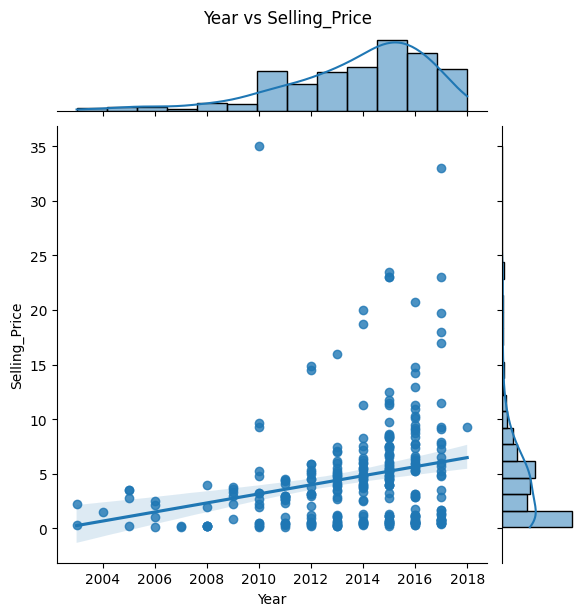

In [8]:
sns.jointplot(x='Year', y = 'Selling_Price' , data = df, kind = 'reg')
plt.suptitle('Year vs Selling_Price ' , y = 1.02)
plt.show()

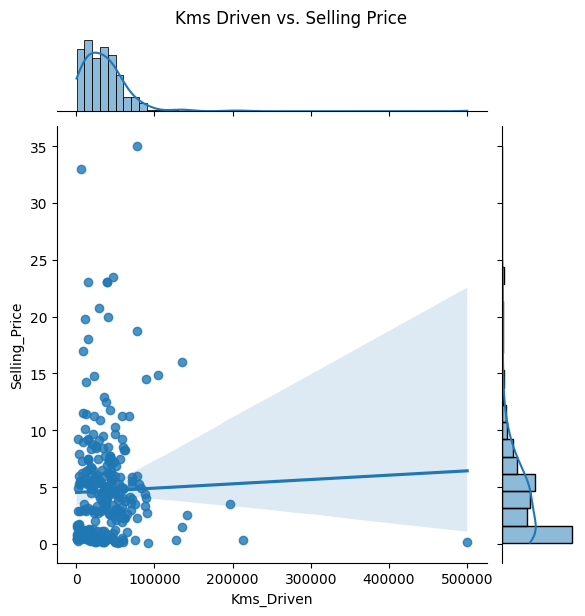

In [9]:
sns.jointplot(x='Kms_Driven', y='Selling_Price', data=df, kind='reg')
plt.suptitle('Kms Driven vs. Selling Price', y=1.02)
plt.show()


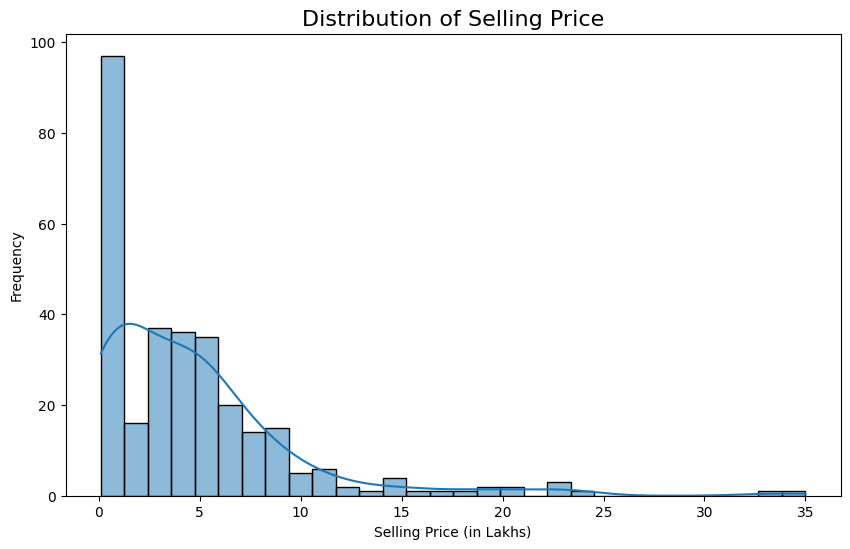

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

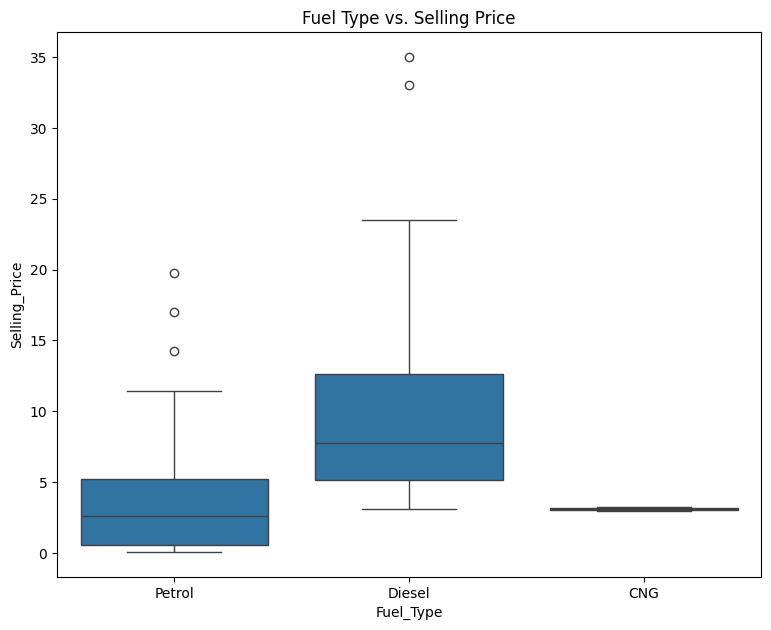

In [21]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Fuel Type vs. Selling Price')
plt.tight_layout()
plt.show()

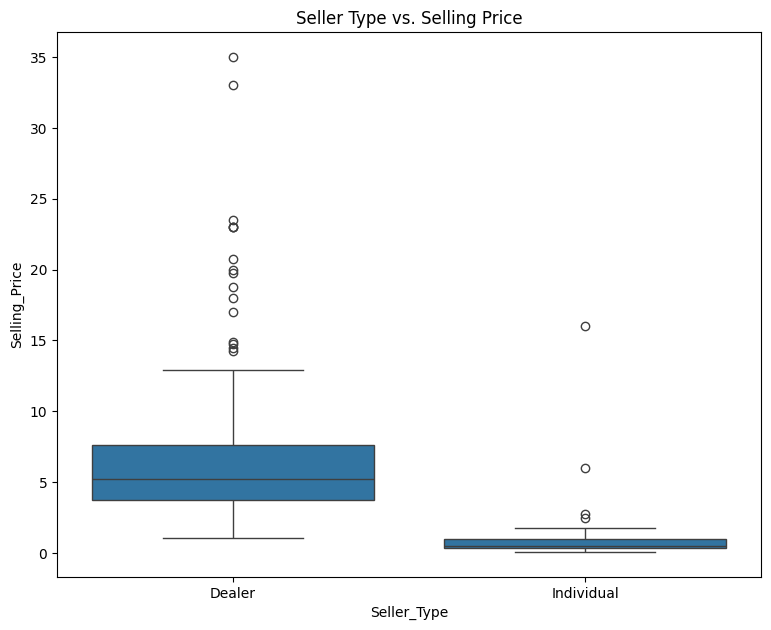

In [20]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 2)
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Seller Type vs. Selling Price')
plt.tight_layout()
plt.show()

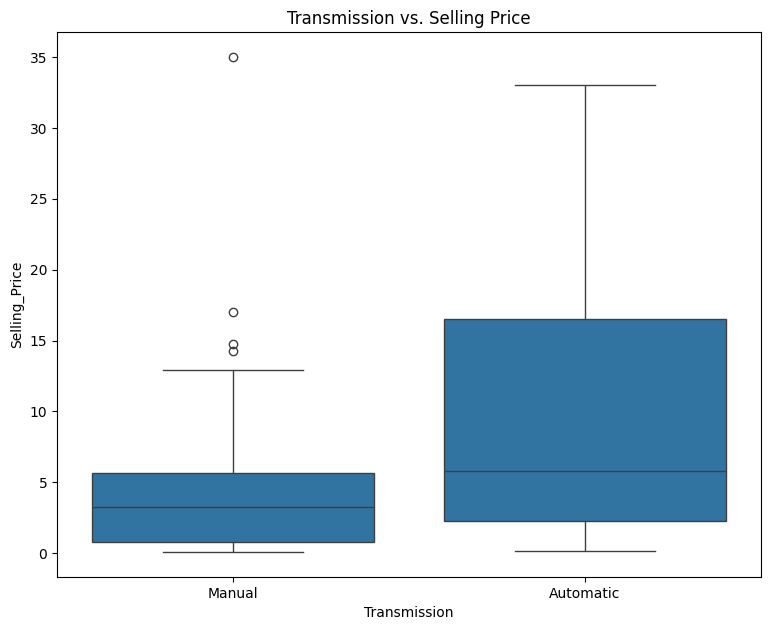

In [19]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 3)
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Transmission vs. Selling Price')
plt.tight_layout()
plt.show()

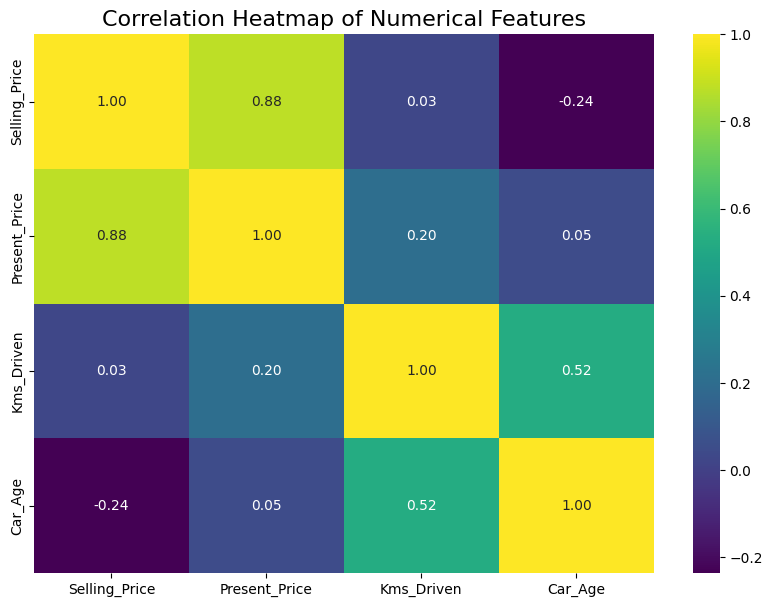

In [22]:
temp_df = df.copy()
temp_df['Car_Age'] = 2025 - temp_df['Year']
numeric_df = temp_df[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age']]

plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

In [10]:
current_year = 2025
df['Car_Age'] = current_year - df['Year']

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [23]:
df.drop(columns=['Car_Name', 'Year'], inplace=True)

In [24]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

In [25]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


In [26]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, min_samples_split=5, min_samples_leaf=2)
rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=200,
                      random_state=42)

In [29]:
y_pred = rf_model.predict(X_test)

In [30]:
print(f'\nMean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_pred):.2f}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')
print(f'R-squared (R2) Score: {metrics.r2_score(y_test, y_pred):.2f}')


Mean Absolute Error (MAE): 0.65
Root Mean Squared Error (RMSE): 1.01
R-squared (R2) Score: 0.96


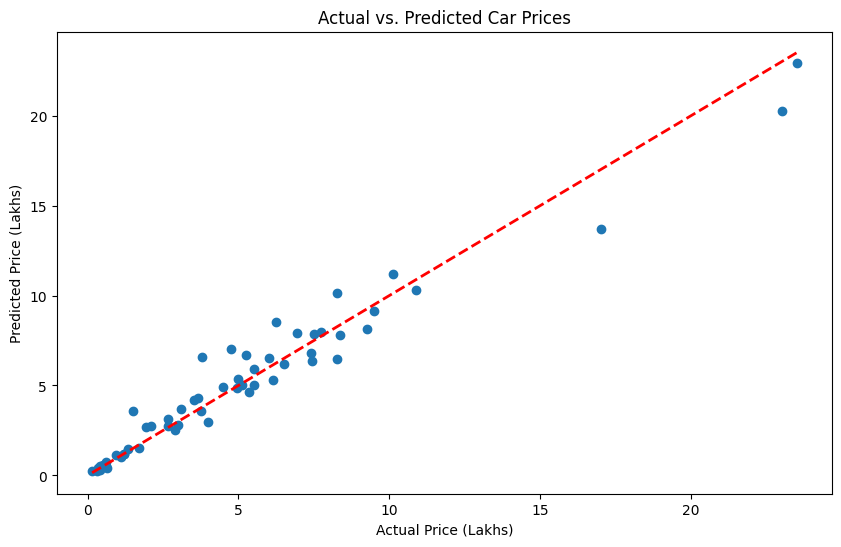

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs. Predicted Car Prices")
# Plotting the ideal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.show()


In [33]:
def predict_car_price():
    """
    Takes user input for car features and predicts the selling price.
    """
    print("\n--- Predict Your Car's Selling Price ---")
    
    # --- Collect User Input ---
    year = int(input("Enter the manufacturing year of the car (e.g., 2015): "))
    present_price = float(input("Enter the current showroom price (in Lakhs, e.g., 8.5): "))
    kms_driven = int(input("Enter the kilometers driven (e.g., 35000): "))
    owner = int(input("Enter the number of previous owners (0, 1, 2, etc.): "))
    
    fuel_type = input("Enter fuel type (Petrol/Diesel/CNG): ").strip().capitalize()
    seller_type = input("Enter seller type (Dealer/Individual): ").strip().capitalize()
    transmission = input("Enter transmission type (Manual/Automatic): ").strip().capitalize()

    # --- Prepare Input for Model ---
    car_age = 2025 - year
    
    # Handle categorical variables with one-hot encoding
    fuel_diesel = 1 if fuel_type == 'Diesel' else 0
    fuel_petrol = 1 if fuel_type == 'Petrol' else 0
    
    seller_individual = 1 if seller_type == 'Individual' else 0
    
    transmission_manual = 1 if transmission == 'Manual' else 0

    # Create the input array in the same order as the model's training columns
    # Order: ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age', 'Fuel_Type_Diesel', 
    #         'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']
    input_data = np.array([[present_price, kms_driven, owner, car_age, 
                            fuel_diesel, fuel_petrol, seller_individual, transmission_manual]])
    
    # --- Make Prediction ---
    prediction = rf_model.predict(input_data)
    
    print("-" * 30)
    print(f"Predicted Selling Price: ₹ {prediction[0]:.2f} Lakhs")
    print("-" * 30)

# Run the prediction function
predict_car_price()



--- Predict Your Car's Selling Price ---


Enter the manufacturing year of the car (e.g., 2015):  2017
Enter the current showroom price (in Lakhs, e.g., 8.5):  6
Enter the kilometers driven (e.g., 35000):  50000
Enter the number of previous owners (0, 1, 2, etc.):  1
Enter fuel type (Petrol/Diesel/CNG):  cng
Enter seller type (Dealer/Individual):  individual
Enter transmission type (Manual/Automatic):  manual


------------------------------
Predicted Selling Price: ₹ 4.39 Lakhs
------------------------------


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [37]:
import pickle

In [38]:
with open('car_price_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)
print("Model exported successfully to 'car_price_model.pkl'")

    # 6. Export the list of feature columns
with open('model_columns.pkl', 'wb') as columns_file:
    pickle.dump(X.columns, columns_file)
print("Model columns exported successfully to 'model_columns.pkl'")

Model exported successfully to 'car_price_model.pkl'
Model columns exported successfully to 'model_columns.pkl'
